In [1]:
import pandas as pd
import numpy as np

import mysql.connector
from sqlalchemy import create_engine
import pandas.io.sql as psql
import sqlalchemy

from dateutil import parser
from datetime import datetime
from datetime import date
from dateutil.relativedelta import relativedelta

from sklearn.cluster import KMeans
import matplotlib.pyplot as plt
from sklearn.naive_bayes import GaussianNB
from sklearn.metrics import confusion_matrix

In [2]:
database_username = 'root'
database_password = 'yash'
database_ip       = '127.0.0.1'
database_name     = 'mainschema'
database_connection = sqlalchemy.create_engine('mysql+mysqlconnector://{0}:{1}@{2}/{3}'.
                                               format(database_username, database_password, 
                                                      database_ip, database_name))

In [3]:
df = pd.read_sql('SELECT * FROM mcbrokerperformance2017', con=database_connection)
del df['index']
df

Name  Hit Ratio  Avg. Growth  Total Recos
0               ICICI Direct         54           13           48
1           Kotak Securities         20            2           10
2            HDFC Securities         45            9           20
3                 KR Choksey         46           12           15
4              Motilal Oswal         53           30           49
5                Nirmal Bang          0            0            1
6                  Edelweiss         51           14           54
7          Dalmia Securities        100           49            2
8       Khambatta Securities         66           12            6
9                Axis Direct         55            9           47
10              JM Financial         52            8           23
11                   Centrum         61           74           13
12              GEPL Capital        100           34            2
13  Cholamandalam Securities         33            1            3
14                   Bonanza         75           26            4
15           Joindre Capital        100           13            1
16                    Geojit        100           93            1
17  Joindre Capital Services        100           19            2
18             Dolat Capital         60           17            5
19           Shahina Mukadam          0            0            1
20          Centrum Research         25            2            4
21  Cholamandalam securities         50            8            2
22            SPA Securities        100           12            1
23                 Sharekhan         38            8           13
24       Reliance Securities         57           18            7
25       Prabhudas Lilladher         72           12           11
26               Share India        100           19            1
27           Geojit Research         33            0            3
28                 KRChoksey         50            7            4
29              LKP Research        100           11            2
30              SPA Research          0            0            1
31               BP Equities        100            5            1

<function matplotlib.pyplot.show(*args, **kw)>

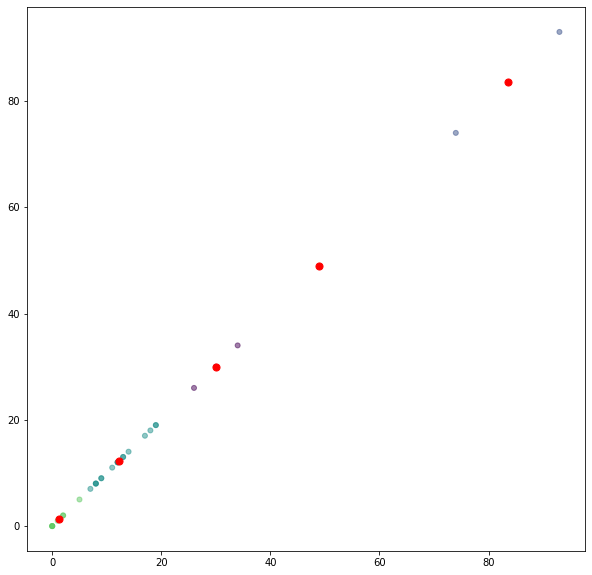

In [4]:
X1 = df[['Avg. Growth','Avg. Growth']]
model1 = KMeans(n_clusters=5).fit(X1)
centroids1 = model1.cluster_centers_
sortedcentroids1 = centroids1[:,0].copy()
sortedcentroids1.sort(axis=0)
labeldict1 = {}
for i in centroids1[:,0] :
    x = list(sortedcentroids1).index(i)
    y = list(centroids1[:,0]).index(i)
    labeldict1[y] = x
    unsortedlabels1 = model1.predict(X1)
sortedlabels1 = []
for element in unsortedlabels1 :
    sortedlabels1.append(labeldict1[element]+1)

plt.figure(figsize=(10,10))
plt.scatter(df['Avg. Growth'], df['Avg. Growth'], c= unsortedlabels1, s=25, alpha=0.5)
plt.scatter(centroids1[:, 0], centroids1[:, 1], c='red', s=50)
plt.show

<function matplotlib.pyplot.show(*args, **kw)>

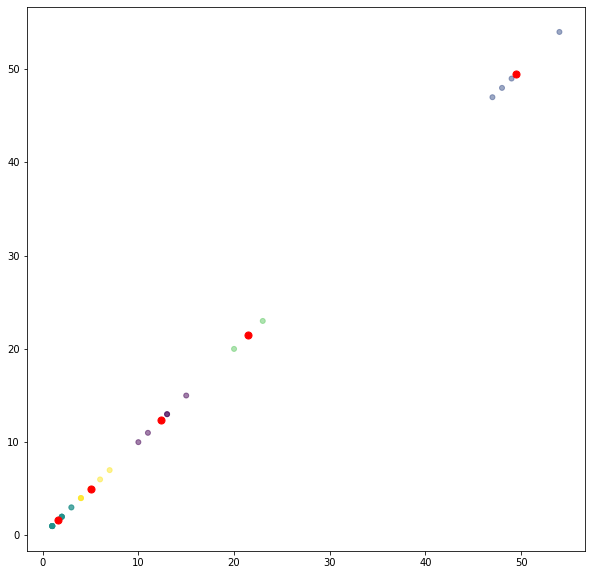

In [5]:
X2 = df[['Total Recos','Total Recos']]
model2 = KMeans(n_clusters=5).fit(X2)
centroids2 = model2.cluster_centers_
sortedcentroids2 = centroids2[:,0].copy()
sortedcentroids2.sort(axis=0)
labeldict2 = {}
for i in centroids2[:,0] :
    x = list(sortedcentroids2).index(i)
    y = list(centroids2[:,0]).index(i)
    labeldict2[y] = x
    unsortedlabels2 = model2.predict(X2)
sortedlabels2 = []
for element in unsortedlabels2 :
    sortedlabels2.append(labeldict2[element]+1)

plt.figure(figsize=(10,10))
plt.scatter(df['Total Recos'], df['Total Recos'], c= unsortedlabels2, s=25, alpha=0.5)
plt.scatter(centroids2[:, 0], centroids2[:, 1], c='red', s=50)
plt.show

<function matplotlib.pyplot.show(*args, **kw)>

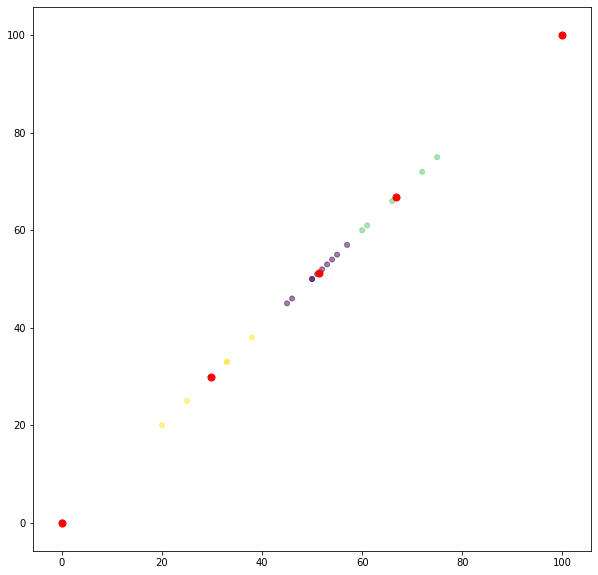

In [6]:
X3 = df[['Hit Ratio','Hit Ratio']]
model3 = KMeans(n_clusters=5).fit(X3)
centroids3 = model3.cluster_centers_
sortedcentroids3 = centroids3[:,0].copy()
sortedcentroids3.sort(axis=0)
labeldict3 = {}
for i in centroids3[:,0] :
    x = list(sortedcentroids3).index(i)
    y = list(centroids3[:,0]).index(i)
    labeldict3[y] = x
    unsortedlabels3 = model3.predict(X3)
sortedlabels3 = []
for element in unsortedlabels3 :
    sortedlabels3.append(labeldict3[element]+1)

plt.figure(figsize=(10,10))
plt.scatter(df['Hit Ratio'], df['Hit Ratio'], c= unsortedlabels3, s=25, alpha=0.5)
plt.scatter(centroids3[:, 0], centroids3[:, 1], c='red', s=50)
plt.show

In [7]:
dfanalysis = pd.DataFrame({'broker': df['Name'], 'Hit Ratio': sortedlabels3,'Avg. Growth' : sortedlabels1, 'Total Recos' : sortedlabels2})
dfanalysis

broker  Hit Ratio  Avg. Growth  Total Recos
0               ICICI Direct          3            2            5
1           Kotak Securities          2            1            3
2            HDFC Securities          3            2            4
3                 KR Choksey          3            2            3
4              Motilal Oswal          3            3            5
5                Nirmal Bang          1            1            1
6                  Edelweiss          3            2            5
7          Dalmia Securities          5            4            1
8       Khambatta Securities          4            2            2
9                Axis Direct          3            2            5
10              JM Financial          3            2            4
11                   Centrum          4            5            3
12              GEPL Capital          5            3            1
13  Cholamandalam Securities          2            1            1
14                   Bonanza          4            3            2
15           Joindre Capital          5            2            1
16                    Geojit          5            5            1
17  Joindre Capital Services          5            2            1
18             Dolat Capital          4            2            2
19           Shahina Mukadam          1            1            1
20          Centrum Research          2            1            2
21  Cholamandalam securities          3            2            1
22            SPA Securities          5            2            1
23                 Sharekhan          2            2            3
24       Reliance Securities          3            2            2
25       Prabhudas Lilladher          4            2            3
26               Share India          5            2            1
27           Geojit Research          2            1            1
28                 KRChoksey          3            2            2
29              LKP Research          5            2            1
30              SPA Research          1            1            1
31               BP Equities          5            1            1

In [8]:
dictstar1 = {1:1,   2:0.8, 3:0.6, 4:0.4, 5:0 }
dictstar2 = {1:0.8, 2:1,   3:0.8, 4:0.6, 5:0.4 }
dictstar3 = {1:0.6, 2:0.8, 3:1,   4:0.8, 5:0.6 }
dictstar4 = {1:0.4, 2:0.6, 3:0.8, 4:1,   5:0.6 }
dictstar5 = {1:0.2, 2:0.4, 3:0.6, 4:0.8, 5:1 }

In [9]:
star = []
for index, row in dfanalysis.iterrows():
    hr = row['Hit Ratio']
    ag = row['Avg. Growth']
    tr = row['Total Recos']
    probabilities = []
    probabilities.append(dictstar1[hr]*dictstar1[ag]*dictstar1[tr]) 
    probabilities.append(dictstar2[hr]*dictstar2[ag]*dictstar2[tr]) 
    probabilities.append(dictstar3[hr]*dictstar3[ag]*dictstar3[tr]) 
    probabilities.append(dictstar4[hr]*dictstar4[ag]*dictstar4[tr]) 
    probabilities.append(dictstar5[hr]*dictstar5[ag]*dictstar5[tr]) 
    rating = probabilities.index(max(probabilities))+1
    star.append(rating)

In [10]:
dfanalysis['Rating'] = star
dfanalysis

broker  Hit Ratio  Avg. Growth  Total Recos  Rating
0               ICICI Direct          3            2            5       3
1           Kotak Securities          2            1            3       2
2            HDFC Securities          3            2            4       3
3                 KR Choksey          3            2            3       3
4              Motilal Oswal          3            3            5       3
5                Nirmal Bang          1            1            1       1
6                  Edelweiss          3            2            5       3
7          Dalmia Securities          5            4            1       3
8       Khambatta Securities          4            2            2       2
9                Axis Direct          3            2            5       3
10              JM Financial          3            2            4       3
11                   Centrum          4            5            3       3
12              GEPL Capital          5            3            1       3
13  Cholamandalam Securities          2            1            1       1
14                   Bonanza          4            3            2       3
15           Joindre Capital          5            2            1       2
16                    Geojit          5            5            1       3
17  Joindre Capital Services          5            2            1       2
18             Dolat Capital          4            2            2       2
19           Shahina Mukadam          1            1            1       1
20          Centrum Research          2            1            2       2
21  Cholamandalam securities          3            2            1       2
22            SPA Securities          5            2            1       2
23                 Sharekhan          2            2            3       2
24       Reliance Securities          3            2            2       2
25       Prabhudas Lilladher          4            2            3       3
26               Share India          5            2            1       2
27           Geojit Research          2            1            1       1
28                 KRChoksey          3            2            2       2
29              LKP Research          5            2            1       2
30              SPA Research          1            1            1       1
31               BP Equities          5            1            1       2

In [11]:
dfanalysis.to_sql(con=database_connection, name='mcfinalrating2017', if_exists='replace')

In [12]:
df2016 = pd.read_sql('SELECT * FROM mcfinalrating2016', con=database_connection)
del df2016['index']
df2016

broker  Hit Ratio  Avg. Growth  Total Recos  Rating
0          Motilal Oswal          2            2            5       2
1        Arihant Capital          3            2            1       2
2        ICICI Securties          1            1            1       1
3            AUM Capital          5            3            1       3
4              Edelweiss          3            2            5       3
..                   ...        ...          ...          ...     ...
89  Khambatta securities          3            3            1       3
90       Shubham Agarwal          3            1            1       1
91        Mayuresh Joshi          5            3            1       3
92          Simi Bhaumik          5            2            1       2
93          Bhavin Desai          5            3            1       3

[94 rows x 5 columns]

In [13]:
Xtrain = df2016[['Hit Ratio','Avg. Growth','Total Recos']].values
Ytrain = df2016['Rating'].values
Xtest = dfanalysis[['Hit Ratio','Avg. Growth','Total Recos']].values

In [14]:
clf = GaussianNB()
clf.fit(Xtrain, Ytrain)
GaussianNB()
Ytest = clf.predict(Xtest)

In [15]:
score = clf.score(Xtest,dfanalysis['Rating'].values)
score

0.6875

In [16]:
confusion_matrix(dfanalysis['Rating'],Ytest)

array([[ 5,  0,  0],
       [ 1, 11,  2],
       [ 0,  7,  6]], dtype=int64)